In [4]:
# pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
import psycopg2
from sqlalchemy import create_engine
from tensorflow import keras
import regex
import datetime as dt



Housing Dataset
---------------


**Dataset characteristics:**

    :Number of instances: 54,670

    :Number of Attributes: 8

    :Attribute Information:

        -'Estimated_Median_Household_Income' Median household income for the year for the city
        -'2021_estimated_population' estimated population for the city in 2021
        -'2020_census' population by census in 2020
        -'Median_Taxes' Median taxes paid for the household in the city
        -'Median_Rent' Median rent paid in the city for each year
        -'AnnualAverageRate30Year' Average mortgage rate for city for 30 year mortgages
        -'Median_Monthly_Income' Median income divided by 12
        -'Monthly_Affordability_Limit' based on 30% of median monthly income

    :Missing Attribute Values:

This dataset was obtained from zillow research data and US census data from 2011 to 2021.

The target variable is 'affordability_home_30yr_Payment_20_Perc_Down'



In [33]:
from config import engine_url

# Create an engine instance

alchemyEngine   = create_engine(engine_url, pool_recycle=3600);

 

# Connect to PostgreSQL server

dbConnection    = alchemyEngine.connect();

 

# Read data from PostgreSQL database table and load into a DataFrame instance

df       = pd.read_sql("select * from \"master_data_set\"", dbConnection);

 

pd.set_option('display.expand_frame_repr', False);

 

# Print the DataFrame

print(df);

 

# Close the database connection

dbConnection.close();

     Identifier  City_Rank_by_Population(2021)       State State_abbreviation         City Observation_Date  Single_Family_Median_Typical_Home_Value  One_Bedroom_Median_Typical_Home_Value  Two_Bedroom_Median_Typical_Home_Value  Three_Bedroom_Median_Typical_Home_Value  ...  affordability_3br_30yr_Payment_10_Perc_Down  affordability_3br_30yr_Payment_20_Perc_Down  affordability_4br_15yr_Payment_10_Perc_Down  affordability_4br_15yr_Payment_20_Perc_Down  affordability_4br_30yr_Payment_10_Perc_Down  affordability_4br_30yr_Payment_20_Perc_Down  affordability_5_plus_br_15yr_Payment_10_Perc_Down  affordability_5_plus_br_15yr_Payment_20_Perc_Down  affordability_5_plus_br_30yr_Payment_10_Perc_Down  affordability_5_plus_br_30yr_Payment_20_Perc_Down
0        201101                              1    New York                 NY     New York       2011-01-01                                 460824.0                               419555.5                               549450.5                           

In [34]:
df

,Identifier,City_Rank_by_Population(2021),State,State_abbreviation,City,Observation_Date,Single_Family_Median_Typical_Home_Value,One_Bedroom_Median_Typical_Home_Value,Two_Bedroom_Median_Typical_Home_Value,Three_Bedroom_Median_Typical_Home_Value,...,affordability_3br_30yr_Payment_10_Perc_Down,affordability_3br_30yr_Payment_20_Perc_Down,affordability_4br_15yr_Payment_10_Perc_Down,affordability_4br_15yr_Payment_20_Perc_Down,affordability_4br_30yr_Payment_10_Perc_Down,affordability_4br_30yr_Payment_20_Perc_Down,affordability_5_plus_br_15yr_Payment_10_Perc_Down,affordability_5_plus_br_15yr_Payment_20_Perc_Down,affordability_5_plus_br_30yr_Payment_10_Perc_Down,affordability_5_plus_br_30yr_Payment_20_Perc_Down
0,201101,1,New York,NY,New York,2011-01-01,460824.0,419555.5,549450.5,455413.0,...,0.60,0.67,0.36,0.40,0.51,0.58,0.29,0.32,0.41,0.46
1,201201,1,New York,NY,New York,2012-01-01,453166.5,421581.5,549293.0,448447.0,...,0.69,0.77,0.39,0.44,0.59,0.66,0.31,0.35,0.47,0.53
2,201301,1,New York,NY,New York,2013-01-01,467125.5,445182.5,579800.5,461446.5,...,0.66,0.74,0.38,0.43,0.56,0.63,0.30,0.34,0.44,0.50
3,201401,1,New York,NY,New York,2014-01-01,499898.0,487199.5,634870.5,493995.0,...,0.61,0.69,0.36,0.40,0.51,0.58,0.28,0.31,0.40,0.45
4,201501,1,New York,NY,New York,2015-01-01,526189.0,536285.0,689511.5,522588.5,...,0.63,0.71,0.36,0.40,0.53,0.59,0.27,0.30,0.40,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,201775,75,New Jersey,NJ,Jersey City,2017-01-01,408525.0,471067.5,537922.5,458794.5,...,0.84,0.95,0.59,0.66,0.87,0.98,0.55,0.61,0.81,0.91
777,201875,75,New Jersey,NJ,Jersey City,2018-01-01,459463.0,503269.5,568473.0,501645.0,...,0.79,0.89,0.55,0.62,0.80,0.90,0.50,0.57,0.73,0.82
778,201975,75,New Jersey,NJ,Jersey City,2019-01-01,489001.0,490562.5,566059.0,523939.5,...,0.91,1.03,0.60,0.68,0.90,1.02,0.56,0.62,0.83,0.94
779,202075,75,New Jersey,NJ,Jersey City,2020-01-01,514131.5,487710.5,570039.5,541306.0,...,0.92,1.03,0.58,0.65,0.90,1.02,0.52,0.59,0.82,0.92


In [35]:
df['affordability_home_30yr_Payment_20_Perc_Down'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 781 entries, 0 to 780
Series name: affordability_home_30yr_Payment_20_Perc_Down
Non-Null Count  Dtype  
--------------  -----  
781 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [36]:
columns_list = df.columns.to_list()

target_list = columns_list[45:]

target_list

['affordability_rent',
 'affordability_home_15yr_Payment_10_Perc_Down',
 'affordability_home_15yr_Payment_20_Perc_Down',
 'affordability_home_30yr_Payment_10_Perc_Down',
 'affordability_home_30yr_Payment_20_Perc_Down',
 'affordability_1br_15yr_Payment_10_Perc_Down',
 'affordability_1br_15yr_Payment_20_Perc_Down',
 'affordability_1br_30yr_Payment_10_Perc_Down',
 'affordability_1br_30yr_Payment_20_Perc_Down',
 'affordability_2br_15yr_Payment_10_Perc_Down',
 'affordability_2br_15yr_Payment_20_Perc_Down',
 'affordability_2br_30yr_Payment_10_Perc_Down',
 'affordability_2br_30yr_Payment_20_Perc_Down',
 'affordability_3br_15yr_Payment_10_Perc_Down',
 'affordability_3br_15yr_Payment_20_Perc_Down',
 'affordability_3br_30yr_Payment_10_Perc_Down',
 'affordability_3br_30yr_Payment_20_Perc_Down',
 'affordability_4br_15yr_Payment_10_Perc_Down',
 'affordability_4br_15yr_Payment_20_Perc_Down',
 'affordability_4br_30yr_Payment_10_Perc_Down',
 'affordability_4br_30yr_Payment_20_Perc_Down',
 'affordabili

In [37]:
df[target_list] = np.where(df[target_list]>=1.00,1, 0)
df

,Identifier,City_Rank_by_Population(2021),State,State_abbreviation,City,Observation_Date,Single_Family_Median_Typical_Home_Value,One_Bedroom_Median_Typical_Home_Value,Two_Bedroom_Median_Typical_Home_Value,Three_Bedroom_Median_Typical_Home_Value,...,affordability_3br_30yr_Payment_10_Perc_Down,affordability_3br_30yr_Payment_20_Perc_Down,affordability_4br_15yr_Payment_10_Perc_Down,affordability_4br_15yr_Payment_20_Perc_Down,affordability_4br_30yr_Payment_10_Perc_Down,affordability_4br_30yr_Payment_20_Perc_Down,affordability_5_plus_br_15yr_Payment_10_Perc_Down,affordability_5_plus_br_15yr_Payment_20_Perc_Down,affordability_5_plus_br_30yr_Payment_10_Perc_Down,affordability_5_plus_br_30yr_Payment_20_Perc_Down
0,201101,1,New York,NY,New York,2011-01-01,460824.0,419555.5,549450.5,455413.0,...,0,0,0,0,0,0,0,0,0,0
1,201201,1,New York,NY,New York,2012-01-01,453166.5,421581.5,549293.0,448447.0,...,0,0,0,0,0,0,0,0,0,0
2,201301,1,New York,NY,New York,2013-01-01,467125.5,445182.5,579800.5,461446.5,...,0,0,0,0,0,0,0,0,0,0
3,201401,1,New York,NY,New York,2014-01-01,499898.0,487199.5,634870.5,493995.0,...,0,0,0,0,0,0,0,0,0,0
4,201501,1,New York,NY,New York,2015-01-01,526189.0,536285.0,689511.5,522588.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,201775,75,New Jersey,NJ,Jersey City,2017-01-01,408525.0,471067.5,537922.5,458794.5,...,0,0,0,0,0,0,0,0,0,0
777,201875,75,New Jersey,NJ,Jersey City,2018-01-01,459463.0,503269.5,568473.0,501645.0,...,0,0,0,0,0,0,0,0,0,0
778,201975,75,New Jersey,NJ,Jersey City,2019-01-01,489001.0,490562.5,566059.0,523939.5,...,0,1,0,0,0,1,0,0,0,0
779,202075,75,New Jersey,NJ,Jersey City,2020-01-01,514131.5,487710.5,570039.5,541306.0,...,0,1,0,0,0,1,0,0,0,0


In [55]:
# corr_df = X.corr()
# corr_df

,Estimated_Median_Household_Income,2021_estimated_population,2020_census,Median_Taxes,Median_Rent,AnnualAverageRate30Year,Median_Monthly_Income,Monthly_Affordability_Limit
Estimated_Median_Household_Income,1.000000,1.607488e-02,1.861983e-02,0.664606,0.871692,-2.140559e-01,1.000000,1.000000
2021_estimated_population,0.016075,1.000000e+00,9.998610e-01,0.158370,0.124975,-6.951612e-16,0.016075,0.016075
2020_census,0.018620,9.998610e-01,1.000000e+00,0.161385,0.127955,-6.742022e-16,0.018620,0.018620
Median_Taxes,0.664606,1.583703e-01,1.613845e-01,1.000000,0.715111,-1.270912e-01,0.664606,0.664606
Median_Rent,0.871692,1.249748e-01,1.279552e-01,0.715111,1.000000,-2.154704e-01,0.871692,0.871692
AnnualAverageRate30Year,-0.214056,-6.951612e-16,-6.742022e-16,-0.127091,-0.215470,1.000000e+00,-0.214056,-0.214056
Median_Monthly_Income,1.000000,1.607497e-02,1.861993e-02,0.664606,0.871692,-2.140559e-01,1.000000,1.000000
Monthly_Affordability_Limit,1.000000,1.607540e-02,1.862035e-02,0.664606,0.871692,-2.140559e-01,1.000000,1.000000


In [38]:
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(df[['City']]))
encode_df.columns=enc.get_feature_names_out(['City'])

In [39]:
df = df.merge(encode_df, left_index=True, right_index=True)
df.drop(columns=['City'], inplace=True)

In [40]:
df['Observation_Date'] = pd.to_datetime(df['Observation_Date'])
df['Year'] = df['Observation_Date'].dt.year

In [41]:
df_eval = df.loc[df['Year']==2021]
df_eval

,Identifier,City_Rank_by_Population(2021),State,State_abbreviation,Observation_Date,Single_Family_Median_Typical_Home_Value,One_Bedroom_Median_Typical_Home_Value,Two_Bedroom_Median_Typical_Home_Value,Three_Bedroom_Median_Typical_Home_Value,Four_Bedroom_Median_Typical_Home_Value,...,City_Santa Ana,City_Seattle,City_Stockton,City_Tampa,City_Tucson,City_Tulsa,City_Virginia Beach,City_Washington,City_Wichita,Year
10,202101,1,New York,NY,2021-01-01,706417.0,603709.0,751189.0,690397.5,829040.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021
21,202102,2,California,CA,2021-01-01,937656.5,575026.0,746089.5,860336.5,1066739.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021
32,202103,3,Illinois,IL,2021-01-01,282580.0,236544.5,284521.5,291592.0,346520.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021
43,202104,4,Texas,TX,2021-01-01,229725.5,132536.0,168663.5,210146.0,276587.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021
54,202105,5,Arizona,AZ,2021-01-01,359291.5,216523.0,277632.0,340718.0,428991.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,202171,71,Nebraska,NE,2021-01-01,239984.0,202191.0,192750.0,240544.5,326178.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021
747,202172,72,Texas,TX,2021-01-01,418720.0,201140.5,291360.0,343630.0,460291.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021
758,202173,73,Alaska,AK,2021-01-01,386293.5,182718.5,233835.5,348141.5,439046.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021
769,202174,74,North Carolina,NC,2021-01-01,314496.5,211638.0,229229.5,292391.5,406237.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021


In [52]:
df_train= df.loc[df['Year']!=2021]
df_train

,Identifier,City_Rank_by_Population(2021),State,State_abbreviation,Observation_Date,Single_Family_Median_Typical_Home_Value,One_Bedroom_Median_Typical_Home_Value,Two_Bedroom_Median_Typical_Home_Value,Three_Bedroom_Median_Typical_Home_Value,Four_Bedroom_Median_Typical_Home_Value,...,City_Santa Ana,City_Seattle,City_Stockton,City_Tampa,City_Tucson,City_Tulsa,City_Virginia Beach,City_Washington,City_Wichita,Year
0,201101,1,New York,NY,2011-01-01,460824.0,419555.5,549450.5,455413.0,532583.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011
1,201201,1,New York,NY,2012-01-01,453166.5,421581.5,549293.0,448447.0,526229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012
2,201301,1,New York,NY,2013-01-01,467125.5,445182.5,579800.5,461446.5,543111.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013
3,201401,1,New York,NY,2014-01-01,499898.0,487199.5,634870.5,493995.0,588659.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014
4,201501,1,New York,NY,2015-01-01,526189.0,536285.0,689511.5,522588.5,628622.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,201675,75,New Jersey,NJ,2016-01-01,365580.5,433664.0,495381.5,410903.0,403386.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
776,201775,75,New Jersey,NJ,2017-01-01,408525.0,471067.5,537922.5,458794.5,445592.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017
777,201875,75,New Jersey,NJ,2018-01-01,459463.0,503269.5,568473.0,501645.0,497800.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
778,201975,75,New Jersey,NJ,2019-01-01,489001.0,490562.5,566059.0,523939.5,529699.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019


In [45]:
columns_list = df.columns.tolist()
columns_list

remove_list = ['Identifier',
 'City_Rank_by_Population(2021)',
 'State',
 'State_abbreviation',
 'Observation_Date',
 '2020_census',
 'AnnualAverageRate15Year',
 'AnnualAverageRate30Year',
 'home_15yr_Payment_10_Perc_Down',
 'home_15yr_Payment_20_Perc_Down',
 'home_30yr_Payment_10_Perc_Down',
 'home_30yr_Payment_20_Perc_Down',
 '1br_15yr_Payment_10_Perc_Down',
 '1br_15yr_Payment_20_Perc_Down',
 '1br_30yr_Payment_10_Perc_Down',
 '1br_30yr_Payment_20_Perc_Down',
 '2br_15yr_Payment_10_Perc_Down',
 '2br_15yr_Payment_20_Perc_Down',
 '2br_30yr_Payment_10_Perc_Down',
 '2br_30yr_Payment_20_Perc_Down',
 '3br_15yr_Payment_10_Perc_Down',
 '3br_15yr_Payment_20_Perc_Down',
 '3br_30yr_Payment_10_Perc_Down',
 '3br_30yr_Payment_20_Perc_Down',
 '4br_15yr_Payment_10_Perc_Down',
 '4br_15yr_Payment_20_Perc_Down',
 '4br_30yr_Payment_10_Perc_Down',
 '4br_30yr_Payment_20_Perc_Down',
 '5_plus_br_15yr_Payment_10_Perc_Down',
 '5_plus_br_15yr_Payment_20_Perc_Down',
 '5_plus_br_30yr_Payment_10_Perc_Down',
 '5_plus_br_30yr_Payment_20_Perc_Down',
 'affordability_rent',
 'affordability_home_15yr_Payment_10_Perc_Down',
 'affordability_home_15yr_Payment_20_Perc_Down',
 'affordability_home_30yr_Payment_10_Perc_Down',
 'affordability_home_30yr_Payment_20_Perc_Down',
 'affordability_1br_15yr_Payment_10_Perc_Down',
 'affordability_1br_15yr_Payment_20_Perc_Down',
 'affordability_1br_30yr_Payment_10_Perc_Down',
 'affordability_1br_30yr_Payment_20_Perc_Down',
 'affordability_2br_15yr_Payment_10_Perc_Down',
 'affordability_2br_15yr_Payment_20_Perc_Down',
 'affordability_2br_30yr_Payment_10_Perc_Down',
 'affordability_2br_30yr_Payment_20_Perc_Down',
 'affordability_3br_15yr_Payment_10_Perc_Down',
 'affordability_3br_15yr_Payment_20_Perc_Down',
 'affordability_3br_30yr_Payment_10_Perc_Down',
 'affordability_3br_30yr_Payment_20_Perc_Down',
 'affordability_4br_15yr_Payment_10_Perc_Down',
 'affordability_4br_15yr_Payment_20_Perc_Down',
 'affordability_4br_30yr_Payment_10_Perc_Down',
 'affordability_4br_30yr_Payment_20_Perc_Down',
 'affordability_5_plus_br_15yr_Payment_10_Perc_Down',
 'affordability_5_plus_br_15yr_Payment_20_Perc_Down',
 'affordability_5_plus_br_30yr_Payment_10_Perc_Down',
 'affordability_5_plus_br_30yr_Payment_20_Perc_Down']

for metric in remove_list:
    columns_list.remove(metric)

columns_list

# x_columns = ['Year','Estimated_Median_Household_Income', '2021_estimated_population', '2020_census', 'Median_Taxes', 'Median_Rent', 'AnnualAverageRate30Year','Median_Monthly_Income','Monthly_Affordability_Limit'] 
# 'home_30yr_Payment_20_Perc_Down', '1br_30yr_Payment_20_Perc_Down', '2br_30yr_Payment_20_Perc_Down', 
# '3br_30yr_Payment_20_Perc_Down', '4br_30yr_Payment_20_Perc_Down', '5_plus_br_30yr_Payment_20_Perc_Down', 'Median_Monthly_Income', 'Monthly_Affordability_Limit'




# y=df['affordability_home_30yr_Payment_20_Perc_Down']

['Single_Family_Median_Typical_Home_Value',
 'One_Bedroom_Median_Typical_Home_Value',
 'Two_Bedroom_Median_Typical_Home_Value',
 'Three_Bedroom_Median_Typical_Home_Value',
 'Four_Bedroom_Median_Typical_Home_Value',
 'Five_Plus_Bedroom_Median_Typical_Home_Value',
 'Estimated_Median_Household_Income',
 '2021_estimated_population',
 'Median_Taxes',
 'Median_Rent',
 'Median_Monthly_Income',
 'Monthly_Affordability_Limit',
 'City_Albuquerque',
 'City_Anaheim',
 'City_Anchorage',
 'City_Arlington',
 'City_Atlanta',
 'City_Aurora',
 'City_Austin',
 'City_Bakersfield',
 'City_Baltimore',
 'City_Boston',
 'City_Charlotte',
 'City_Chicago',
 'City_Cincinnati',
 'City_Cleveland',
 'City_Colorado Springs',
 'City_Columbus',
 'City_Corpus Christi',
 'City_Dallas',
 'City_Denver',
 'City_Detroit',
 'City_Durham',
 'City_El Paso',
 'City_Fort Worth',
 'City_Fresno',
 'City_Greensboro',
 'City_Henderson',
 'City_Houston',
 'City_Indianapolis',
 'City_Irvine',
 'City_Jacksonville',
 'City_Jersey City',

In [47]:
len(columns_list)

84

In [46]:
X = df_train[columns_list]

In [48]:
for target in target_list:
    y=df_train[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    nn_model = tf.keras.models.Sequential()
    nn_model.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=84))
    nn_model.add(tf.keras.layers.Dense(units=50, activation="relu"))
    nn_model.add(tf.keras.layers.Dense(units=25, activation="relu"))
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the Sequential model together and customize metrics
    nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


    # Train the model
    fit_model = nn_model.fit(X_train_scaled, y_train, epochs=25)

    # Evaluate the model using the test data
    model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/25
17/17 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8872
Epoch 2/25
17/17 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9398
Epoch 3/25
17/17 [==============================] - 0s 1ms/step - loss: 0.0868 - accuracy: 0.9662
Epoch 4/25
17/17 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9868
Epoch 5/25
17/17 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9887
Epoch 6/25
17/17 [==============================] - 0s 1ms/step - loss: 0.0325 - accuracy: 0.9887
Epoch 7/25
17/17 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.9868
Epoch 8/25
17/17 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 0.9868
Epoch 9/25
17/17 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.9850
Epoch 10/25
17/17 [==============================] - 0s 997us/step - loss: 0.0213 - accuracy: 0.9887
Epoch 11/25
17/17

Make Model from 2011-2020

In [49]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)


In [50]:
for target in target_list:
    y=df_train[target]

    #Build Dense layers for neural network
    nn_model = tf.keras.models.Sequential()
    nn_model.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=84))
    nn_model.add(tf.keras.layers.Dense(units=50, activation="relu"))
    nn_model.add(tf.keras.layers.Dense(units=25, activation="relu"))
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the Sequential model together and customize metrics
    nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


    # Train the model
    fit_model = nn_model.fit(X_scaled, y, epochs=25)

    # Evaluate the model
    model_loss, model_accuracy = nn_model.evaluate(X_scaled, y ,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    print(nn_model.summary())
    nn_model.save("./Models/"+ target +"_model.h5")


Epoch 1/25
23/23 [==============================] - 0s 1ms/step - loss: 0.2412 - accuracy: 0.9338
Epoch 2/25
23/23 [==============================] - 0s 1ms/step - loss: 0.1115 - accuracy: 0.9465
Epoch 3/25
23/23 [==============================] - 0s 1ms/step - loss: 0.0741 - accuracy: 0.9690
Epoch 4/25
23/23 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9775
Epoch 5/25
23/23 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 0.9831
Epoch 6/25
23/23 [==============================] - 0s 952us/step - loss: 0.0373 - accuracy: 0.9859
Epoch 7/25
23/23 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9873
Epoch 8/25
23/23 [==============================] - 0s 1ms/step - loss: 0.0281 - accuracy: 0.9859
Epoch 9/25
23/23 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9901
Epoch 10/25
23/23 [==============================] - 0s 997us/step - loss: 0.0228 - accuracy: 0.9887
Epoch 11/25
23/

In [53]:
y_eval = pd.DataFrame(nn_model.predict(df_eval[columns_list]))
y_eval.value_counts()

3/3 [==============================] - 0s 997us/step


0.0    71
dtype: int64

In [54]:
# Load specific model
model = keras.models.load_model('./Models/affordability_home_30yr_Payment_20_Perc_Down_model.h5')


In [55]:
X = df_eval[columns_list]
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [56]:
y_eval = pd.DataFrame(model.predict(X_scaled))
y_eval.value_counts()

3/3 [==============================] - 0s 997us/step


0.999999    2
0.999966    2
0.999982    1
0.999986    1
0.999985    1
           ..
0.999945    1
0.999949    1
0.999963    1
0.999964    1
0.999966    1
Length: 69, dtype: int64

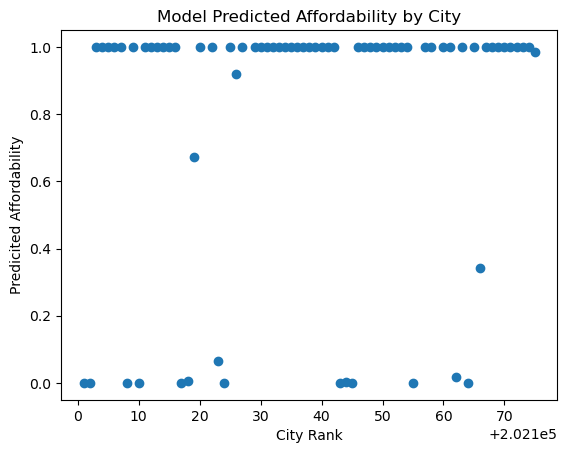

<Figure size 2000x1000 with 0 Axes>

In [109]:
plt.scatter(df_eval["Identifier"], y_eval)
plt.title("Model Predicted Affordability by City")
plt.xlabel("City Rank")
plt.ylabel("Predicited Affordability")
plt.figure(figsize=(20,10))
fig1 = plt.gcf()

fig1.savefig('./Models/y_eval.png', dpi=300, bbox_inches='tight')
plt.show()

In [80]:
# y_eval["Predicted Affordability"] = y_eval['0']
predictions = y_eval.values

In [76]:
# def tuple_to_list(t):
#     new_list = []
#     for element in t:
#         new_list.append(element)
#     return new_list

In [77]:
# tuple_to_list(predictions)


[[0.0004764550249092281],
 [0.0003354166401550174],
 [0.9999276399612427],
 [0.999983549118042],
 [0.9999647736549377],
 [0.9999939799308777],
 [0.999984860420227],
 [0.00023871212033554912],
 [0.9999764561653137],
 [3.6344230466056615e-05],
 [0.9996306896209717],
 [0.9999993443489075],
 [0.9999845623970032],
 [0.9998601078987122],
 [0.999998927116394],
 [0.9999494552612305],
 [1.3941385077487212e-06],
 [0.005148479249328375],
 [0.6709432005882263],
 [0.9999979138374329],
 [0.9999885559082031],
 [0.06465340405702591],
 [0.00040660781087353826],
 [0.9999664425849915],
 [0.919150710105896],
 [0.9999732971191406],
 [0.9999657869338989],
 [0.9999993443489075],
 [0.9999985098838806],
 [0.9999832510948181],
 [0.9999991059303284],
 [0.9999189972877502],
 [0.9999222755432129],
 [0.9994804859161377],
 [0.9999954700469971],
 [0.9999181628227234],
 [0.9999955296516418],
 [0.9998908042907715],
 [0.9999860525131226],
 [0.9999641180038452],
 [0.0003473287506494671],
 [0.0014566942118108273],
 [0.000

In [81]:
df_eval['Predictions'] = predictions

C:\Users\mattw\AppData\Local\Temp\ipykernel_27216\3468428877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['Predictions'] = predictions


In [82]:
df_eval

,Identifier,City_Rank_by_Population(2021),State,State_abbreviation,Observation_Date,Single_Family_Median_Typical_Home_Value,One_Bedroom_Median_Typical_Home_Value,Two_Bedroom_Median_Typical_Home_Value,Three_Bedroom_Median_Typical_Home_Value,Four_Bedroom_Median_Typical_Home_Value,...,City_Seattle,City_Stockton,City_Tampa,City_Tucson,City_Tulsa,City_Virginia Beach,City_Washington,City_Wichita,Year,Predictions
10,202101,1,New York,NY,2021-01-01,706417.0,603709.0,751189.0,690397.5,829040.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.000476
21,202102,2,California,CA,2021-01-01,937656.5,575026.0,746089.5,860336.5,1066739.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.000335
32,202103,3,Illinois,IL,2021-01-01,282580.0,236544.5,284521.5,291592.0,346520.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.999928
43,202104,4,Texas,TX,2021-01-01,229725.5,132536.0,168663.5,210146.0,276587.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.999984
54,202105,5,Arizona,AZ,2021-01-01,359291.5,216523.0,277632.0,340718.0,428991.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.999965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,202171,71,Nebraska,NE,2021-01-01,239984.0,202191.0,192750.0,240544.5,326178.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.999969
747,202172,72,Texas,TX,2021-01-01,418720.0,201140.5,291360.0,343630.0,460291.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.999963
758,202173,73,Alaska,AK,2021-01-01,386293.5,182718.5,233835.5,348141.5,439046.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.999995
769,202174,74,North Carolina,NC,2021-01-01,314496.5,211638.0,229229.5,292391.5,406237.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.999989


In [88]:
df_eval['Affordability'] = np.where(df_eval["Predictions"]>=0.5, 1, 0)

df_eval

C:\Users\mattw\AppData\Local\Temp\ipykernel_27216\2251194048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['Affordability'] = np.where(df_eval["Predictions"]>=0.5, 1, 0)


,Identifier,City_Rank_by_Population(2021),State,State_abbreviation,Observation_Date,Single_Family_Median_Typical_Home_Value,One_Bedroom_Median_Typical_Home_Value,Two_Bedroom_Median_Typical_Home_Value,Three_Bedroom_Median_Typical_Home_Value,Four_Bedroom_Median_Typical_Home_Value,...,City_Tampa,City_Tucson,City_Tulsa,City_Virginia Beach,City_Washington,City_Wichita,Year,Predictions,Afforability,Affordability
10,202101,1,New York,NY,2021-01-01,706417.0,603709.0,751189.0,690397.5,829040.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.000476,0,0
21,202102,2,California,CA,2021-01-01,937656.5,575026.0,746089.5,860336.5,1066739.5,...,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.000335,0,0
32,202103,3,Illinois,IL,2021-01-01,282580.0,236544.5,284521.5,291592.0,346520.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.999928,1,1
43,202104,4,Texas,TX,2021-01-01,229725.5,132536.0,168663.5,210146.0,276587.5,...,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.999984,1,1
54,202105,5,Arizona,AZ,2021-01-01,359291.5,216523.0,277632.0,340718.0,428991.5,...,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.999965,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,202171,71,Nebraska,NE,2021-01-01,239984.0,202191.0,192750.0,240544.5,326178.5,...,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.999969,1,1
747,202172,72,Texas,TX,2021-01-01,418720.0,201140.5,291360.0,343630.0,460291.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.999963,1,1
758,202173,73,Alaska,AK,2021-01-01,386293.5,182718.5,233835.5,348141.5,439046.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.999995,1,1
769,202174,74,North Carolina,NC,2021-01-01,314496.5,211638.0,229229.5,292391.5,406237.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2021,0.999989,1,1


In [90]:
df_eval.loc[df_eval['affordability_home_30yr_Payment_20_Perc_Down'] != df_eval['Affordability']]


,Identifier,City_Rank_by_Population(2021),State,State_abbreviation,Observation_Date,Single_Family_Median_Typical_Home_Value,One_Bedroom_Median_Typical_Home_Value,Two_Bedroom_Median_Typical_Home_Value,Three_Bedroom_Median_Typical_Home_Value,Four_Bedroom_Median_Typical_Home_Value,...,City_Tampa,City_Tucson,City_Tulsa,City_Virginia Beach,City_Washington,City_Wichita,Year,Predictions,Afforability,Affordability
